# Preprocessing

In [2]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', -1)
pandas.set_option('display.precision', 3)

data = pandas.read_csv('./spotify-track-prediction/datasets/SpotifyAudioFeatures-full.csv')
data['duration'] = data['duration_ms']*(1/1000)*(1/60)
data = data.drop(labels='Unnamed: 0',axis=1)
data = data.drop(labels='duration_ms',axis=1)
data = data.drop(labels='artist_name',axis=1)
data = data.drop(labels='track_name',axis=1)
data = data.drop(labels='track_id',axis=1)

data.head()

,popularity,num_artists,release_month,release_weekday,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
0,99,1,9,5,0.695,0.762,0,-3.497,1,0.040,0.192,2.440e-03,0.086,0.553,120.042,4,7,11,3.588
1,98,1,10,5,0.598,0.427,7,-8.764,0,0.032,0.055,5.830e-06,0.210,0.060,76.469,4,19,12,2.929
2,94,2,10,5,0.474,0.631,5,-5.884,0,0.343,0.069,0.000e+00,0.132,0.425,180.051,4,40,10,3.155
3,99,1,10,3,0.505,0.340,4,-9.005,1,0.044,0.576,0.000e+00,0.210,0.092,101.993,4,19,12,3.441
4,97,1,8,5,0.778,0.559,6,-7.109,0,0.078,0.128,0.000e+00,0.399,0.678,129.989,1,15,9,3.085


## Description of numeric values

In [3]:
data.describe(include=[np.number])

,popularity,num_artists,release_month,release_weekday,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
count,9341.000,9341.00,9341.000,9341.000,9341.000,9.341e+03,9341.000,9341.000,9341.000,9341.000,9341.000,9.341e+03,9341.000,9341.000,9341.000,9341.000,9341.000,9341.000,9341.000
mean,56.366,1.63,7.630,4.546,0.592,5.348e-01,5.118,-9.746,0.628,0.115,0.374,1.758e-01,0.177,0.444,118.067,3.883,22.205,11.456,3.449
std,18.858,1.01,3.164,1.117,0.201,2.624e-01,3.584,7.119,0.483,0.119,0.359,3.393e-01,0.141,0.238,31.795,0.501,20.948,5.181,1.561
min,0.000,1.00,1.000,1.000,0.000,2.000e-05,0.000,-43.710,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,1.000,2.000,0.101
25%,55.000,1.00,5.000,5.000,0.460,3.640e-01,2.000,-10.970,0.000,0.040,0.054,0.000e+00,0.098,0.254,92.975,4.000,9.000,8.000,2.719
50%,61.000,1.00,8.000,5.000,0.622,5.840e-01,5.000,-7.004,1.000,0.057,0.231,4.760e-06,0.119,0.434,117.934,4.000,14.000,11.000,3.249
75%,67.000,2.00,11.000,5.000,0.745,7.330e-01,8.000,-5.227,1.000,0.142,0.702,3.020e-02,0.202,0.620,140.024,4.000,27.000,14.000,3.765
max,100.000,16.00,11.000,7.000,0.981,1.000e+00,11.000,0.634,1.000,0.933,0.996,9.980e-01,0.986,0.980,241.005,5.000,185.000,49.000,25.785


Histograms


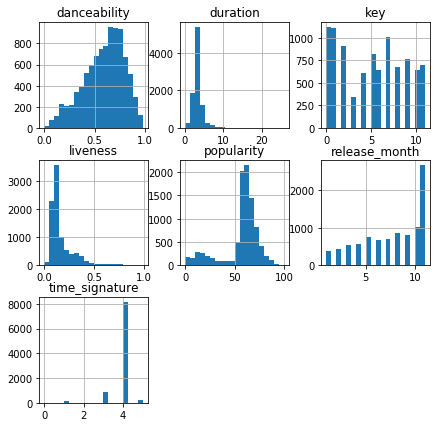

In [4]:
data.hist(column=['popularity', 'danceability', 'key','liveness', 'duration', 'time_signature', 'release_month'],  bins=20, figsize=[7,7])
print("Histograms")

## Identify errors or ouliers - univariate analysis

In [5]:
data[data.duration>data.duration.mean()+5*data.duration.std()]

,popularity,num_artists,release_month,release_weekday,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
1013,72,1,8,5,0.417,0.529,9,-9.338,0,0.032,2.110e-03,7.550e-01,0.110,0.056,114.116,1,6,4,11.887
1168,71,1,8,5,0.461,0.566,9,-9.133,0,0.057,9.890e-03,7.860e-01,0.109,0.387,88.067,1,10,4,12.741
1549,69,1,8,5,0.323,0.803,7,-7.397,1,0.037,7.350e-05,8.340e-01,0.096,0.386,144.755,5,7,4,15.725
1653,69,1,8,5,0.330,0.610,10,-9.571,1,0.049,2.190e-03,7.690e-01,0.107,0.240,172.677,1,10,4,13.631
1827,30,1,11,5,0.326,0.898,2,-5.658,1,0.075,7.170e-01,8.770e-01,0.227,0.356,109.044,4,37,13,13.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,8,3,11,5,0.399,0.288,2,-18.921,0,0.052,9.120e-01,8.490e-01,0.094,0.245,113.956,4,61,20,14.015
7184,5,2,11,5,0.325,0.166,0,-23.006,1,0.032,9.830e-01,9.210e-01,0.077,0.070,97.539,4,87,20,13.154
7203,4,2,11,5,0.248,0.016,2,-28.296,1,0.040,9.810e-01,4.290e-01,0.082,0.080,90.677,5,118,20,13.567
7204,5,3,11,5,0.265,0.136,4,-20.702,1,0.040,9.790e-01,8.630e-01,0.112,0.170,140.030,4,68,20,11.983


We can see above some very long songs (more than 10 minutes). Since there are a lot of them we can assure they aren't outliers or errors.

### Common error checkups

In [6]:
data[data.release_month > 12]
data[data.release_weekday > 7]
data[data.num_artists < 1]

,popularity,num_artists,release_month,release_weekday,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration


## Boxplots and histograms

Boxplots


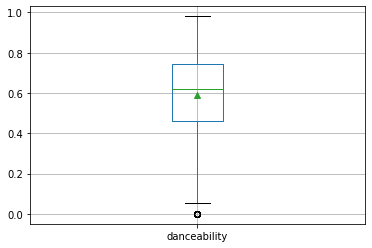

In [7]:
data.boxplot(column=['danceability'],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")

## Normalization

We first create our labels by dividing the 'popularity' feature into three categories. With that we try a simple knn classifier and see its score. We then check the range of each numerical feature to see if a low score can be attributed to the data not being normalized.

In [8]:
dat = data.apply(pandas.to_numeric)
dat['popularity'] = pandas.qcut(dat['popularity'], 3, labels=[1, 2, 3]) # 1=not popular, 2=popular, 3=very popular

X_data = dat.drop(labels='popularity',axis=1).to_numpy()
Y_data = dat['popularity'].to_numpy()
dat.describe()

,num_artists,release_month,release_weekday,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
count,9341.00,9341.000,9341.000,9341.000,9.341e+03,9341.000,9341.000,9341.000,9341.000,9341.000,9.341e+03,9341.000,9341.000,9341.000,9341.000,9341.000,9341.000,9341.000
mean,1.63,7.630,4.546,0.592,5.348e-01,5.118,-9.746,0.628,0.115,0.374,1.758e-01,0.177,0.444,118.067,3.883,22.205,11.456,3.449
std,1.01,3.164,1.117,0.201,2.624e-01,3.584,7.119,0.483,0.119,0.359,3.393e-01,0.141,0.238,31.795,0.501,20.948,5.181,1.561
min,1.00,1.000,1.000,0.000,2.000e-05,0.000,-43.710,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,1.000,2.000,0.101
25%,1.00,5.000,5.000,0.460,3.640e-01,2.000,-10.970,0.000,0.040,0.054,0.000e+00,0.098,0.254,92.975,4.000,9.000,8.000,2.719
50%,1.00,8.000,5.000,0.622,5.840e-01,5.000,-7.004,1.000,0.057,0.231,4.760e-06,0.119,0.434,117.934,4.000,14.000,11.000,3.249
75%,2.00,11.000,5.000,0.745,7.330e-01,8.000,-5.227,1.000,0.142,0.702,3.020e-02,0.202,0.620,140.024,4.000,27.000,14.000,3.765
max,16.00,11.000,7.000,0.981,1.000e+00,11.000,0.634,1.000,0.933,0.996,9.980e-01,0.986,0.980,241.005,5.000,185.000,49.000,25.785


In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb
import numpy as np

cv = StratifiedKFold(n_splits=10, random_state=1) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_data,y=Y_data, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.45582782543258904

In [10]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,20,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X_data, Y_data)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 13, 'weights': 'uniform'} Accuracy= 0.46964993041430253


In [11]:
for i in range(len(X_data[1,:])):
    print('std:',X_data[:,i].std(),'min',X_data[:,i].min(),'max',X_data[:,i].max())

std: 1.0099389835439232 min 1.0 max 16.0
std: 3.164132348955298 min 1.0 max 11.0
std: 1.116674318250079 min 1.0 max 7.0
std: 0.20081311516167696 min 0.0 max 0.981
std: 0.26242020040996167 min 2e-05 max 1.0
std: 3.5841682560535624 min 0.0 max 11.0
std: 7.118310484811306 min -43.71 max 0.634
std: 0.48325743108426755 min 0.0 max 1.0
std: 0.11931620863044844 min 0.0 max 0.9329999999999999
std: 0.35885097608500643 min 0.0 max 0.996
std: 0.3392567241990427 min 0.0 max 0.998
std: 0.14140427192304433 min 0.0 max 0.986
std: 0.23775715425935068 min 0.0 max 0.98
std: 31.792890710522116 min 0.0 max 241.005
std: 0.5011359346557789 min 0.0 max 5.0
std: 20.947069128599114 min 1.0 max 185.0
std: 5.180699258575073 min 2.0 max 49.0
std: 1.5607116004955597 min 0.10103333333333334 max 25.785066666666665


In [12]:
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X_data)
X2=scaler.transform(X_data)

for i in range(13):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 1.0 min -0.6237120803146922 max 14.22867033526877
std: 0.9999999999999999 min -2.095333068670811 max 1.0650909898555971
std: 1.0 min -3.1750993196158688 max 2.1979981913956648
std: 0.9999999999999999 min -2.948443294571732 max 1.9366958020962597
std: 1.0000000000000002 min -2.037906219621366 max 1.7726998177103543
std: 1.0 min -1.4278197717445733 max 1.641232575734176
std: 1.0 min -4.771373840640277 max 1.4581942703066968
std: 1.0 min -1.3001462165202025 max 0.7691442603097874
std: 0.9999999999999998 min -0.9617647785185316 max 6.857793106443517
std: 1.0000000000000002 min -1.0411841978492145 max 1.7343412051082028
std: 0.9999999999999998 min -0.5181522644091312 max 2.423572773926354
std: 1.0 min -1.2507469163819145 max 5.722168304571278
std: 0.9999999999999999 min -1.8682112074454764 max 2.2536416261857446


In [13]:
# Let's repeat the 10-fold Cross-validation with new data X2
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X2, Y_data)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 19, 'weights': 'distance'} Accuracy= 0.5003746922171074


In [14]:
dat.to_csv('../datasets/SpotifyDataset.csv')